# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Michael Jonathan Halim
- **Email:** mjh191003@gmail.com
- **ID Dicoding:** maikell

## Menentukan Pertanyaan Bisnis

- Produk apa yang mendapatkan ulasan atau rating terbaik?
- Wilayah mana yang memiliki penjualan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import warnings
import folium

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

In [3]:
# Define directory data
data_path = './data'

# Read all datasets
orders = pd.read_csv(data_path + '/orders_dataset.csv')
customers = pd.read_csv(data_path + '/customers_dataset.csv')
geolocation = pd.read_csv(data_path + '/geolocation_dataset.csv')
products = pd.read_csv(data_path +  '/products_dataset.csv')
items = pd.read_csv(data_path + '/order_items_dataset.csv')
reviews = pd.read_csv(data_path + '/order_reviews_dataset.csv')

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Untuk menjawab pertanyaan pertama, diperlukan dataset orders, items, reviews, products
- Untuk menjawab pertanyaan kedua, diperlukan dataset orders, customers, geolocation

### Assessing Data

#### Getting Information for Each Dataset

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Describe Each Dataset

In [16]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [17]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [18]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [19]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [20]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [21]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Checking Missing Values for Each Dataset

In [22]:
table_md = "| Feature | Null Percentage |\n| --- | --- |\n"
for feature in orders.columns:
    null_pct = orders[feature].isnull().mean() * 100
    table_md += f"| {feature} | {null_pct:.2f}% |\n"
display(Markdown("<h3>Percentage of Null Values in Dataset</h3>"))
display(Markdown(table_md))

<h3>Percentage of Null Values in Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| order_id | 0.00% |
| customer_id | 0.00% |
| order_status | 0.00% |
| order_purchase_timestamp | 0.00% |
| order_approved_at | 0.16% |
| order_delivered_carrier_date | 1.79% |
| order_delivered_customer_date | 2.98% |
| order_estimated_delivery_date | 0.00% |


In [23]:
table_md = "| Feature | Null Percentage |\n| --- | --- |\n"
for feature in customers.columns:
    null_pct = customers[feature].isnull().mean() * 100
    table_md += f"| {feature} | {null_pct:.2f}% |\n"
display(Markdown("<h3>Percentage of Null Values in Dataset</h3>"))
display(Markdown(table_md))

<h3>Percentage of Null Values in Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| customer_id | 0.00% |
| customer_unique_id | 0.00% |
| customer_zip_code_prefix | 0.00% |
| customer_city | 0.00% |
| customer_state | 0.00% |


In [24]:
table_md = "| Feature | Null Percentage |\n| --- | --- |\n"
for feature in geolocation.columns:
    null_pct = geolocation[feature].isnull().mean() * 100
    table_md += f"| {feature} | {null_pct:.2f}% |\n"
display(Markdown("<h3>Percentage of Null Values in Dataset</h3>"))
display(Markdown(table_md))

<h3>Percentage of Null Values in Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| geolocation_zip_code_prefix | 0.00% |
| geolocation_lat | 0.00% |
| geolocation_lng | 0.00% |
| geolocation_city | 0.00% |
| geolocation_state | 0.00% |


In [25]:
table_md = "| Feature | Null Percentage |\n| --- | --- |\n"
for feature in products.columns:
    null_pct = products[feature].isnull().mean() * 100
    table_md += f"| {feature} | {null_pct:.2f}% |\n"
display(Markdown("<h3>Percentage of Null Values in Dataset</h3>"))
display(Markdown(table_md))

<h3>Percentage of Null Values in Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| product_id | 0.00% |
| product_category_name | 1.85% |
| product_name_lenght | 1.85% |
| product_description_lenght | 1.85% |
| product_photos_qty | 1.85% |
| product_weight_g | 0.01% |
| product_length_cm | 0.01% |
| product_height_cm | 0.01% |
| product_width_cm | 0.01% |


In [26]:
table_md = "| Feature | Null Percentage |\n| --- | --- |\n"
for feature in items.columns:
    null_pct = items[feature].isnull().mean() * 100
    table_md += f"| {feature} | {null_pct:.2f}% |\n"
display(Markdown("<h3>Percentage of Null Values in Dataset</h3>"))
display(Markdown(table_md))

<h3>Percentage of Null Values in Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| order_id | 0.00% |
| order_item_id | 0.00% |
| product_id | 0.00% |
| seller_id | 0.00% |
| shipping_limit_date | 0.00% |
| price | 0.00% |
| freight_value | 0.00% |


In [27]:
table_md = "| Feature | Null Percentage |\n| --- | --- |\n"
for feature in reviews.columns:
    null_pct = reviews[feature].isnull().mean() * 100
    table_md += f"| {feature} | {null_pct:.2f}% |\n"
display(Markdown("<h3>Percentage of Null Values in Dataset</h3>"))
display(Markdown(table_md))

<h3>Percentage of Null Values in Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| review_id | 0.00% |
| order_id | 0.00% |
| review_score | 0.00% |
| review_comment_title | 88.34% |
| review_comment_message | 58.70% |
| review_creation_date | 0.00% |
| review_answer_timestamp | 0.00% |


#### Checking Duplicates for Each Dataset

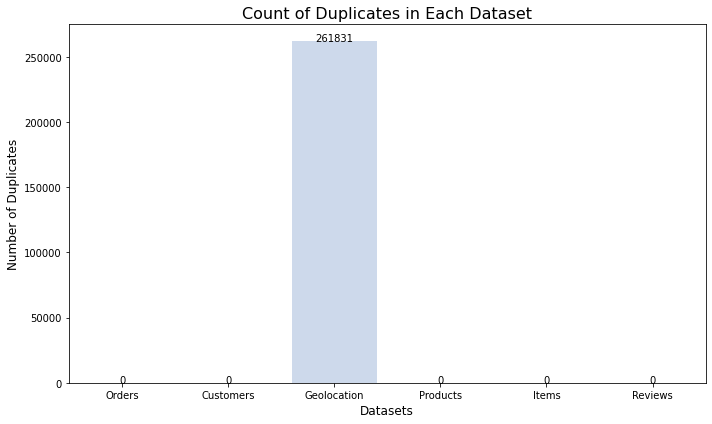

In [28]:
datasets = {
    'Orders': orders,
    'Customers': customers,
    'Geolocation': geolocation,
    'Products': products,
    'Items': items,
    'Reviews': reviews,
}

duplicate_counts = {name: df.duplicated().sum() for name, df in datasets.items()}
df_duplicate_counts = pd.DataFrame(list(duplicate_counts.items()), columns=['Dataset', 'Duplicate_Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Duplicate_Count', data=df_duplicate_counts, palette='coolwarm')
plt.title("Count of Duplicates in Each Dataset", fontsize=16)
plt.xlabel("Datasets", fontsize=12)
plt.ylabel("Number of Duplicates", fontsize=12)

for index, row in df_duplicate_counts.iterrows():
    plt.text(index, row.Duplicate_Count + 0.1, row.Duplicate_Count, color='black', ha="center")

plt.tight_layout()
plt.show()

**Insight:**
- Data yang diperlukan mostly tidak null, beberapa terdapat null values namun persentasenya kecil. Missing values dapat dihandle dengan imputasi.
- Data review seperti title dan message banyak yang null, tapi data seperti ini memang tidak required saat memberikan penilaian terhadap order.
- Terdapat duplicate rows yang sangat banyak pada geolocation dataset. Perlu didrop untuk baris-baris ini.

### Cleaning Data

#### Drop Duplicate Rows

In [29]:
for key, data in datasets.items():
    print(f"Rows {key} before dropping duplicates:", len(data))
    data.drop_duplicates(inplace=True)
    print(f"Rows {key} after dropping duplicates:", len(data))

Rows Orders before dropping duplicates: 99441
Rows Orders after dropping duplicates: 99441
Rows Customers before dropping duplicates: 99441
Rows Customers after dropping duplicates: 99441
Rows Geolocation before dropping duplicates: 1000163
Rows Geolocation after dropping duplicates: 738332
Rows Products before dropping duplicates: 32951
Rows Products after dropping duplicates: 32951
Rows Items before dropping duplicates: 112650
Rows Items after dropping duplicates: 112650
Rows Reviews before dropping duplicates: 99224
Rows Reviews after dropping duplicates: 99224


#### Drop Unneeded Columns

In [30]:
# Kolom yang pasti tidak dipakai akan didrop, pertimbangan juga karena banyaknya missing values
reviews.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [31]:
reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [32]:
# Kolom yang pasti tidak dipakai akan didrop
columns_to_drop = [
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

orders.drop(columns=columns_to_drop, inplace=True)

In [33]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [34]:
# Kolom yang pasti tidak dipakai akan didrop
columns_to_drop = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

# Drop the specified columns
products.drop(columns=columns_to_drop, inplace=True)

In [35]:
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


#### Missing Values Imputation

In [36]:
# Product yang tidak ada categorynya kita isikan dengan Other
products.fillna({'product_category_name': 'Other'}, inplace=True)

In [37]:
table_md = "| Feature | Null Percentage |\n| --- | --- |\n"
for feature in products.columns:
    null_pct = products[feature].isnull().mean() * 100
    table_md += f"| {feature} | {null_pct:.2f}% |\n"
display(Markdown("<h3>Percentage of Null Values in Dataset</h3>"))
display(Markdown(table_md))

<h3>Percentage of Null Values in Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| product_id | 0.00% |
| product_category_name | 0.00% |


**Insight:**
- Berhasil dihapuskan duplicate rows pada seluruh dataset
- Terdapat beberapa kolom yang perlu didrop dari dataset karena tidak diperlukan untuk menjawab pertanyaan bisnis serta untuk handle missing values.
- Handle missing values diperlukan pada product name agar dipastikan setiap produk memiliki nama

## Exploratory Data Analysis (EDA)

### Merge All Data

In [38]:
main_df = pd.merge(orders, customers, on='customer_id', how='inner')
main_df = pd.merge(main_df, items, on='order_id', how='inner')
main_df = pd.merge(main_df, products, on='product_id', how='inner')
main_df = pd.merge(main_df, reviews, on='order_id', how='left')
main_df = pd.merge(main_df, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
main_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,...,product_category_name,review_id,review_score,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.575033,-46.587451,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.580054,-46.586673,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.576281,-46.587276,sao paulo,SP


### Explore Customer City

In [39]:
# Top 10 Customer City Based on Order
main_df['customer_city'].value_counts().head(10)

customer_city
rio de janeiro    1077266
sao paulo          875682
belo horizonte     535658
niteroi            236838
curitiba           187207
uberlandia         171007
porto alegre       166320
santos             155593
campinas           145417
santo andre        129337
Name: count, dtype: int64

### Explore Trends

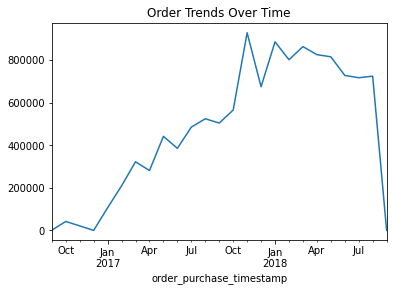

In [40]:
# Melihat trend banyaknya order setiap bulan
main_df['order_purchase_timestamp'] = pd.to_datetime(main_df['order_purchase_timestamp'])
main_df.groupby(main_df['order_purchase_timestamp'].dt.to_period("M")).size().plot(kind='line')
plt.title("Order Trends Over Time")
plt.show()

### Explore Review Score

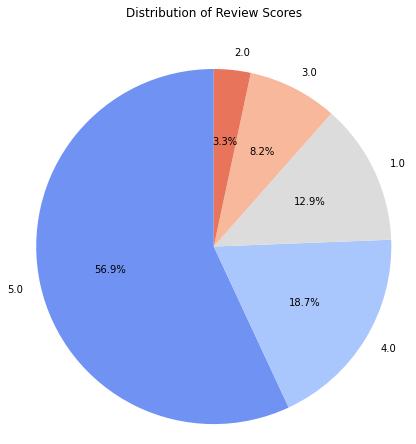

In [41]:
# Melihat distribusi review score
review_score_counts = main_df['review_score'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(review_score_counts, labels=review_score_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(review_score_counts)))
plt.title('Distribution of Review Scores', pad=40)
plt.axis('equal')
plt.show()

# Explore Order Status

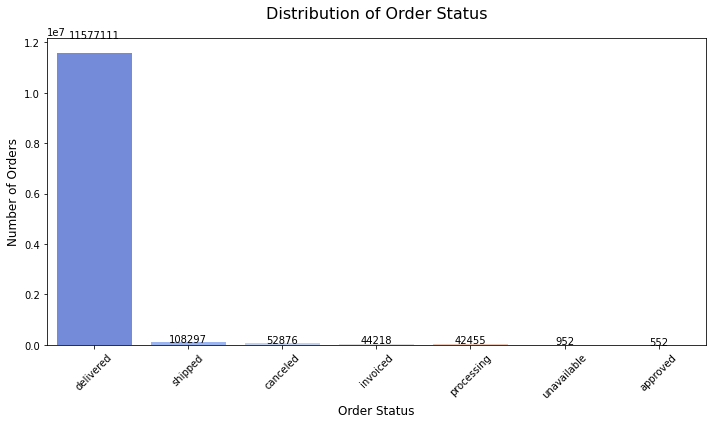

In [42]:
# Melihat distribusi order status
order_status_counts = main_df['order_status'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='coolwarm')
plt.title('Distribution of Order Status', fontsize=16, pad=20)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

for i, count in enumerate(order_status_counts.values):
    plt.text(i, count + 0.05 * count, str(count), ha='center', fontsize=10)

plt.show()

**Insight:**
- Banyaknya order setiap bulannya selalu meningkat
- Lebih dari 50% review dari order memiliki review score 5
- Hampir seluruh order berhasil dikirimkan ke customer

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang mendapatkan ulasan atau rating terbaik?

In [43]:
# Dapatkan Top 5 Produk dengan Review Score Terbaik beserta Jumlah Review Terbanyak
best_rated_products = main_df.groupby('product_id').agg({
    'review_score': ['mean', 'count'],
    'product_category_name': 'first'
}).reset_index()

best_rated_products.columns = ['product_id', 'average_review_score', 'review_count', 'product_category_name']
best_rated_products = best_rated_products.sort_values(by=['average_review_score', 'review_count'], ascending=[False, False])
best_rated_products.head(5)

,product_id,average_review_score,review_count,product_category_name
3011,16ce899c7af0c99f46948734a0d00f0f,5.0,4821,papelaria
17,002af88741ba70c7b5cf4e4a0ad7ef85,5.0,3666,cool_stuff
25034,c2c989ac5100e59a6c3d12b2c31a2c72,5.0,3576,moveis_decoracao
5122,26c6145c9687019a428467c8852ae36b,5.0,2976,bebes
32624,fd9f8eff0fa910129e366594485e00dd,5.0,2253,esporte_lazer


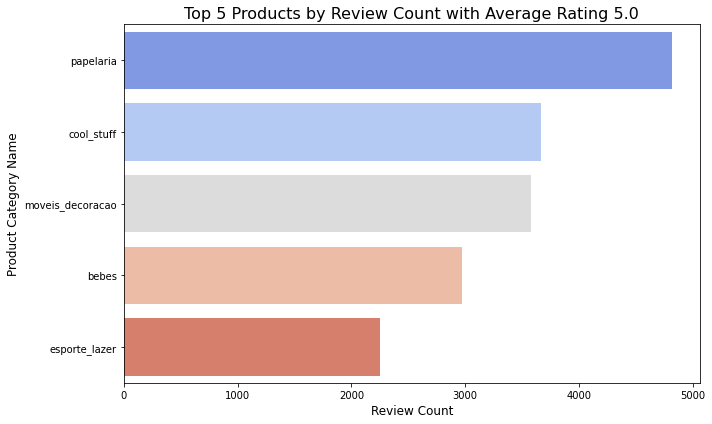

In [44]:
plt.figure(figsize=(10, 6))
top_5_products = best_rated_products.head(5)

sns.barplot(y='product_category_name', x='review_count', data=top_5_products, palette='coolwarm')
plt.title('Top 5 Products by Review Count with Average Rating 5.0', fontsize=16)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Product Category Name', fontsize=12)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Wilayah mana yang memiliki penjualan terbanyak?

In [45]:
sales_by_region = main_df.groupby('customer_city').agg({
    'price': 'sum',
    'order_id': 'count'
}).reset_index()

sales_by_region.columns = ['customer_city', 'total_sales', 'order_count']
sales_by_region = sales_by_region.sort_values(by='total_sales', ascending=False)
sales_by_region.head(10)

,customer_city,total_sales,order_count
3147,rio de janeiro,1.353218e+08,1077266
3588,sao paulo,9.418016e+07,875682
452,belo horizonte,6.019401e+07,535658
2455,niteroi,2.843891e+07,236838
1141,curitiba,2.195964e+07,187207
3941,uberlandia,2.023214e+07,171007
2956,porto alegre,1.966122e+07,166320
3407,santos,1.824743e+07,155593
1188,divinopolis,1.687088e+07,90867
705,campinas,1.650763e+07,145417


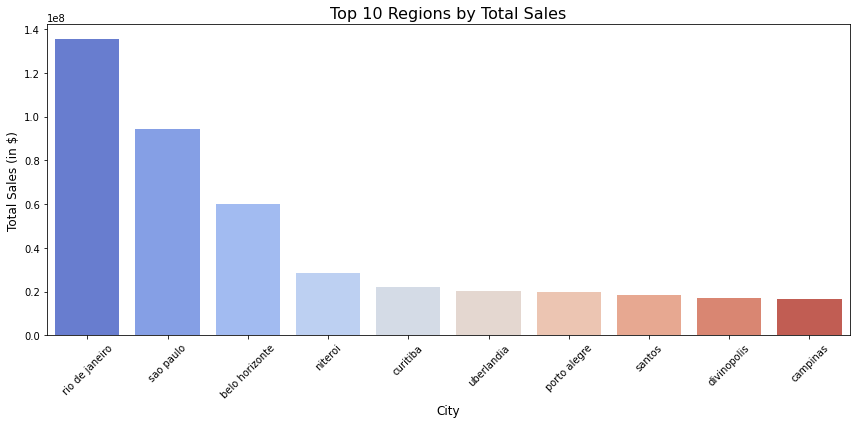

In [46]:
top_regions = sales_by_region.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='total_sales', data=top_regions, palette='coolwarm')

plt.title('Top 10 Regions by Total Sales', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales (in $)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan analisis, dapat disimpulkan bahwa Papelaria merupakan kategori produk yang paling diminati dengan rating tertinggi sebesar 5.0. Hal ini menunjukkan bahwa produk-produk di kategori Papelaria tidak hanya populer di kalangan konsumen, tetapi juga memiliki kualitas yang sangat baik di mata konsumen. Dengan pencapaian rating sempurna, Papelaria dapat dikategorikan sebagai best product yang dijual di e-commerce, sehingga produk ini berpotensi untuk dipromosikan lebih lanjut atau dijadikan acuan dalam mengembangkan produk baru di kategori serupa.

- Selain itu, kota Rio de Janeiro muncul sebagai wilayah dengan jumlah transaksi order tertinggi di platform e-commerce. Hal ini mengindikasikan tingginya aktivitas belanja online di kota tersebut, menjadikannya pasar yang sangat potensial untuk pengembangan bisnis. Dengan banyaknya konsumen yang aktif melakukan transaksi di Rio de Janeiro, strategi pemasaran dan distribusi yang lebih intensif dapat difokuskan di area ini.

## Analisis Lanjutan

### RFM Analysis

In [63]:
current_date = pd.to_datetime('2024-09-28')
rfm = main_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

In [64]:
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2332,51,6624.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2335,60,1134.00
2,0000f46a3911fa3c0805444483337064,2758,78,5382.00
3,0000f6ccb0745a6a4b88665a16c9f078,2542,28,727.72
4,0004aac84e0df4da2b147fca70cf8255,2509,102,18360.00


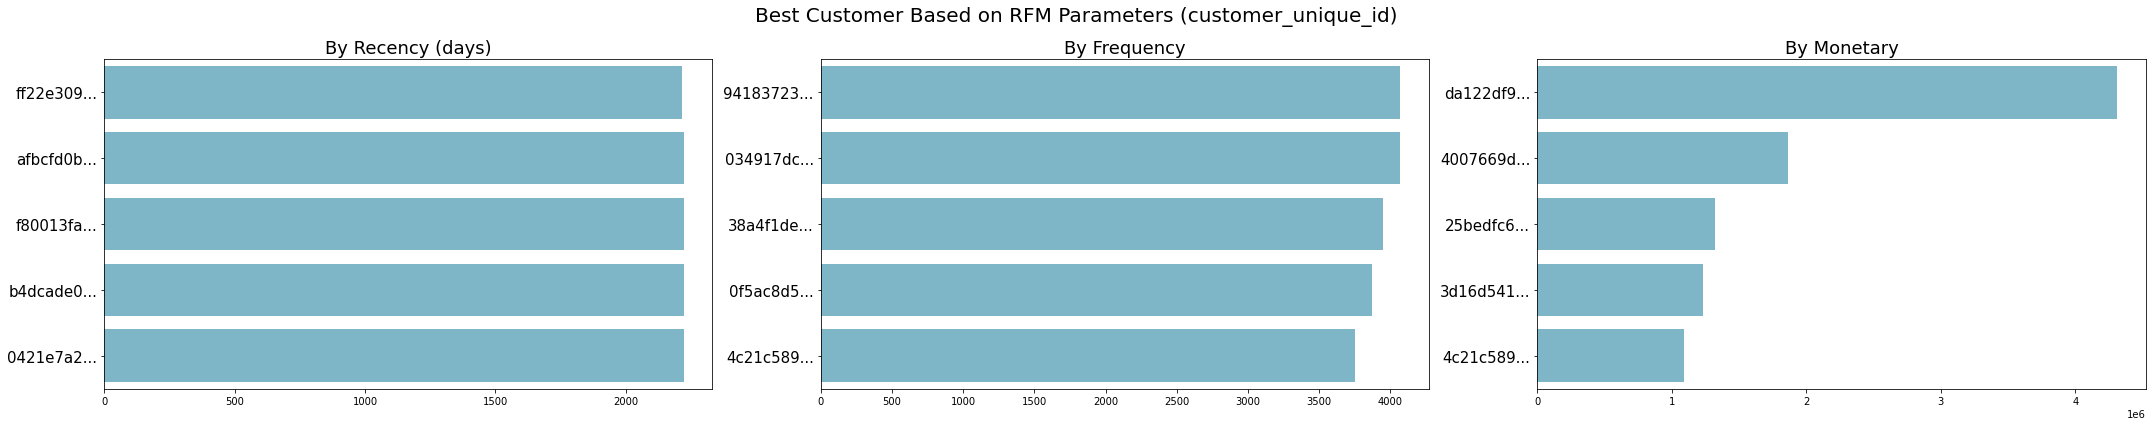

In [60]:
def truncate_customer_id(customer_id, max_length=8):
    return customer_id if len(customer_id) <= max_length else customer_id[:max_length] + '...'

rfm['customer_unique_id_truncated'] = rfm['customer_unique_id'].apply(truncate_customer_id)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x="recency", y="customer_unique_id_truncated", 
            data=rfm.sort_values(by="recency", ascending=True).head(5), 
            palette=colors, ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="frequency", y="customer_unique_id_truncated", 
            data=rfm.sort_values(by="frequency", ascending=False).head(5), 
            palette=colors, ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

sns.barplot(x="monetary", y="customer_unique_id_truncated", 
            data=rfm.sort_values(by="monetary", ascending=False).head(5), 
            palette=colors, ax=ax[2])

ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)

plt.tight_layout()
plt.show()

### Geospatial Analysis

In [49]:
sales_by_customer = main_df.groupby('customer_id').agg({
    'price': 'sum',
    'geolocation_lat': 'first',
    'geolocation_lng': 'first',
    'customer_city': 'first'
}).reset_index()

top_sales_customers = sales_by_customer.sort_values(by='price', ascending=False).head(1000)
filtered_df = top_sales_customers.dropna(subset=['geolocation_lat', 'geolocation_lng'])
m = folium.Map(location=[filtered_df['geolocation_lat'].mean(), filtered_df['geolocation_lng'].mean()], zoom_start=5)

for index, row in filtered_df.iterrows():
    folium.Marker([row['geolocation_lat'], row['geolocation_lng']], popup=row['customer_city']).add_to(m)

# Save the map to an HTML file
m.save('top_sales_customer_locations.html')

In [65]:
display(m)

### Clustering Analysis

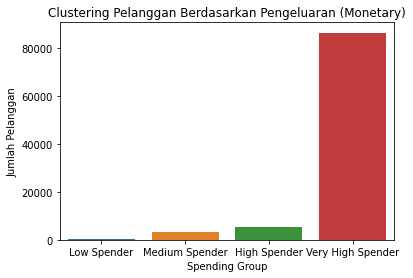

In [51]:
# Mengelompokkan pelanggan berdasarkan pengeluaran mereka (Monetary) menggunakan binning
bins = [0, 100, 500, 1000, float('inf')]
labels = ['Low Spender', 'Medium Spender', 'High Spender', 'Very High Spender']

rfm['spending_group'] = pd.cut(rfm['monetary'], bins=bins, labels=labels)

# Visualisasi jumlah pelanggan di setiap cluster
sns.countplot(x='spending_group', data=rfm)
plt.title('Clustering Pelanggan Berdasarkan Pengeluaran (Monetary)')
plt.xlabel('Spending Group')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Insight:
- Sebagian besar pelanggan e-commerce termasuk dalam kategori Very High Spender, yang menunjukkan bahwa mayoritas pelanggan mengeluarkan jumlah uang yang signifikan untuk bertransaksi secara online.
- Seluruh pelanggan dengan pengeluaran tertinggi tersebar di berbagai wilayah di Brasil, mengindikasikan potensi pasar yang besar di negara tersebut.
- Dengan menggunakan RFM Analysis, kita dapat mengidentifikasi pelanggan yang menjadi top spender (pengeluaran terbesar) dan top order (frekuensi transaksi tertinggi), memberikan peluang bagi bisnis untuk menargetkan mereka dengan strategi pemasaran yang lebih efektif.

## Conclusion

- Dapat disimpulkan bahwa papelaria merupakan produk dengan peminat terbanyak beserta rating terbaik sebesar 5.0, membuat produk papelaria menjadi best product yang dijual di e-commerce. Hal ini bisa menjadi potensi untuk membuat dan menjual produk-produk yang serupa dengan papelaria untuk meningkatkan revenue.
- Dapat disimpulkan bahwa kota Rio de Janeiro merupakan kota dengan konsumen e-commerce terbanyak, membuat kota ini menjadi potensi tempat bisnis yang besar untuk meningkatkan revenue.
- Dapat disimpulkan bahwa kebanyakan pelanggan e-commerce termasuk pada very high spender, artinya kebanyakan customer mengeluarkan banyak uang untuk bertransaksi membeli produk secara online.
- Dapat disimpulkan bahwa seluruh customer dengan pengeluaran terbanyak tersebar di daerah brasil.
- Dapat disimpulkan bahwa dengan RFM, kita dapat melihat customer mana yang menjadi top spender dan top order.